<a href="https://colab.research.google.com/github/Seung-heon-Baek/AIGENDRUG/blob/main/Fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 55.3 MB/s eta 0:00:00


Zongertinib: CC1=CC(NC2=NC=NC3=CN=C(N4CCC(NC(C=C)=O)CC4)N=C32)=CC=C1OC5=CC(N=CN6C)=C6C=C5

HM100714:
CC1=CC(NC2=NC=NC3=CC=C(/C=C/CN(C)C(C=C)=O)N=C32)=CC=C1OC4=CC(N=CN5C)=C5C=C4

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem       # Fingerpritn 계산
from rdkit import DataStructs        # Similarity 계산
from rdkit.Chem import Descriptors   # Descritor 계산

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
Zon_smi = 'CC1=CC(NC2=NC=NC3=CN=C(N4CCC(NC(C=C)=O)CC4)N=C32)=CC=C1OC5=CC(N=CN6C)=C6C=C5'
HM714_smi = 'CC1=CC(NC2=NC=NC3=CC=C(/C=C/CN(C)C(C=C)=O)N=C32)=CC=C1OC4=CC(N=CN5C)=C5C=C4'

Zon_mol = Chem.MolFromSmiles(Zon_smi)
HM714_mol = Chem.MolFromSmiles(HM714_smi)

In [23]:
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize=2048) #fpSize default 2048 #ECFP를 계산해주는 RDkit 함수: AllChem.GetMorganGenerator
fpgen2 = AllChem.GetMorganGenerator(radius=2, fpSize=1024)
Zon_fp = fpgen.GetFingerprint(Zon_mol)
HM714_fp = fpgen.GetFingerprint(HM714_mol)
Zon_fp_1024 = fpgen2.GetFingerprint(Zon_mol)
HM714_fp_1024 = fpgen2.GetFingerprint(HM714_mol)
print(Zon_fp)
print(HM714_fp)

In [24]:
Zon_fp_bs = Zon_fp.ToBitString()
print('Zongertinib_ECFP4 : ', Zon_fp_bs)

HM714_fp_bs = HM714_fp.ToBitString()
print('HM100714_ECFP4 : ', HM714_fp_bs)

Zon_fp_1024_bs = Zon_fp_1024.ToBitString()
print('Zongertinib_ECFP4_1024 : ', Zon_fp_1024_bs)

HM714_fp_1024_bs = HM714_fp_1024.ToBitString()
print('HM100714_ECFP4_1024 : ', HM714_fp_1024_bs)

Zongertinib_ECFP4 :  0000000000000000000000000000000000000000000001000000000000000000000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000001000000000000000100000010000010000000000000000000000000000000000000000001000000001000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000000100000000000000000000000000000000000000000000000000000000000101000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000110000000000001000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000011000000000000000000000000000000011000000000001000000000000000000000000000000000000010000010010000000000000000000000010000000000000000000

In [25]:
print("Zon_fp_bs 길이:", len(Zon_fp_bs))
print("HM714_fp_bs 길이:", len(HM714_fp_bs))

print("Zon_fp_1024_bs 길이:", len(Zon_fp_1024_bs))
print("HM714_fp_1024_bs 길이:", len(HM714_fp_1024_bs))

Zon_fp_bs 길이: 2048
HM714_fp_bs 길이: 2048
Zon_fp_1024_bs 길이: 1024
HM714_fp_1024_bs 길이: 1024


In [26]:
diff_indices = [i for i in range(len(Zon_fp_bs)) if Zon_fp_bs[i] != HM714_fp_bs[i]]

diff_indices_1024 = [i for i in range(len(Zon_fp_1024_bs)) if Zon_fp_1024_bs[i] != HM714_fp_1024_bs[i]]

In [28]:
print(f"서로 다른 비트 개수: {len(diff_indices)}")
print(f"서로 다른 비트 인덱스 (앞부분 20개만 예시): {diff_indices[:20]}")

# print(f"서로 다른 비트 개수: {len(diff_indices_1024)}")
# print(f"서로 다른 비트 인덱스 (앞부분 20개만 예시): {diff_indices_1024[:20]}")

서로 다른 비트 개수: 42
서로 다른 비트 인덱스 (앞부분 20개만 예시): [80, 82, 185, 297, 334, 335, 387, 407, 525, 540, 579, 829, 835, 881, 926, 949, 961, 1010, 1019, 1032]


In [16]:
Zon_fp_bs2 = '00000000000000000000000000000000000000000000010000000000000000000000000000000000001000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000010000000000000001000000100000100000000000000000000000000000000000000000010000000010000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000010100000000000000000000000001000000000000000000000000000000000000000000000000000000000001010000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000001100000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000001000000000000110000000000000000000000000000000110000000000010000000000000000000000000000000000000100000100100000000000000000000000100000000000000000000000000000000000000001000000000100000000100000000000010000000010000000000000001000000000000000000000000000000000000000100000000000000000000000000000000000000000000000100000010000000000000001000000000000100000000000100000000000000000000000000000000100000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000100000000001000000000000000000000000000001100100000000010000000000100000000000000000100000000000000000000000000000000010000000010000000000000000000000000001000000000000000000000000000000001000100000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000100000000001000000000100000000000010000000000000000000000000000000000000000000000000000010100000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000000000001000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000100000000001000000000000000'
HM714_fp_bs2 = '00000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000100000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000010000000010000000000000001000000100001000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010100000000000000000000000001000000010000000000000010000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000001100000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000001000000110000000000000000000000000000000110000100000010000000000000000000000000000000000000000000100100000000000001000000000101000000000000000000000000000000000000001000000000000000000000000000000000100000000000000000000001000000000000000000000000000000000000000100000000000000000000000000000000000000000000000100000010000000000100000000000000000000000000000110000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000001000000000000000000010000000001100100000000010000000000100000000000000000100000000000000000000100000000000000000000010000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000010100000000000000000000000001000000000000000000001000000000000000000000000000000000000001000000000000000000000100000000000000000000001000000000000000001000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000100000000000000000000000000000010000000000000000000100000000000000000001000000'

In [14]:
print(type(Zon_fp_bs))
print(type(Zon_fp_bs2))

<class 'str'>
<class 'str'>


In [17]:
diff_indices_zon = [i for i in range(len(Zon_fp_bs)) if Zon_fp_bs[i] != Zon_fp_bs2[i]]

print(f"서로 다른 비트 개수: {len(diff_indices_zon)}")
print(f"서로 다른 비트 인덱스 (앞부분 20개만 예시): {diff_indices_zon[:20]}")

diff_indices_HM714 = [i for i in range(len(HM714_fp_bs)) if HM714_fp_bs[i] != HM714_fp_bs2[i]]

print(f"서로 다른 비트 개수: {len(diff_indices_HM714)}")
print(f"서로 다른 비트 인덱스 (앞부분 20개만 예시): {diff_indices_HM714[:20]}")

서로 다른 비트 개수: 0
서로 다른 비트 인덱스 (앞부분 20개만 예시): []
서로 다른 비트 개수: 0
서로 다른 비트 인덱스 (앞부분 20개만 예시): []


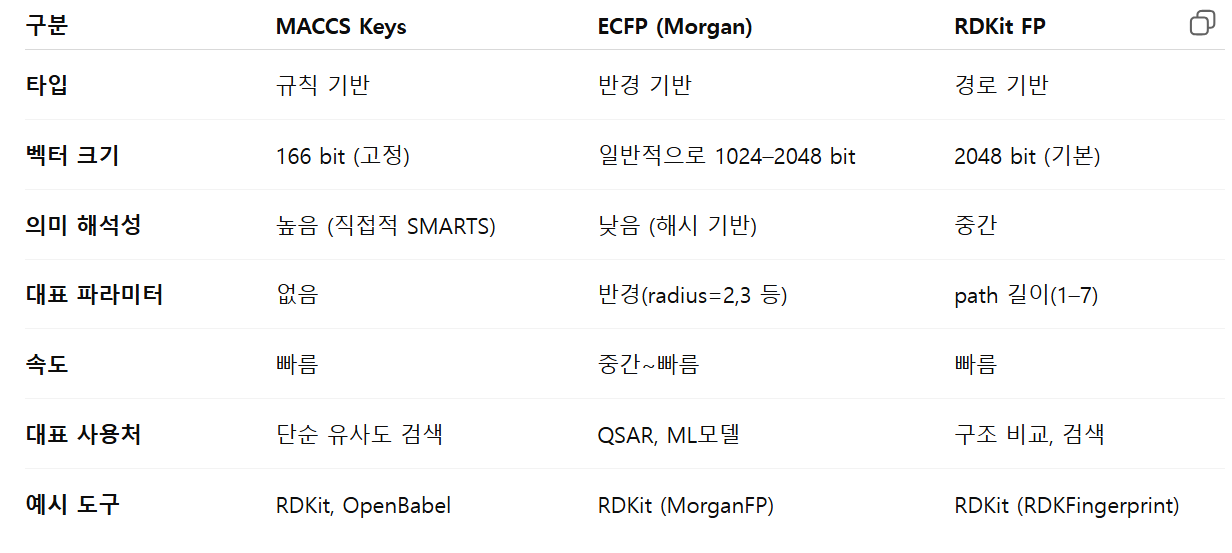

In [29]:
from rdkit import DataStructs

# Tanimoto similarity 계산
tanimoto_score = DataStructs.TanimotoSimilarity(Zon_fp, HM714_fp)

print("Tanimoto similarity (ECFP4):", tanimoto_score)


Tanimoto similarity (ECFP4): 0.5625


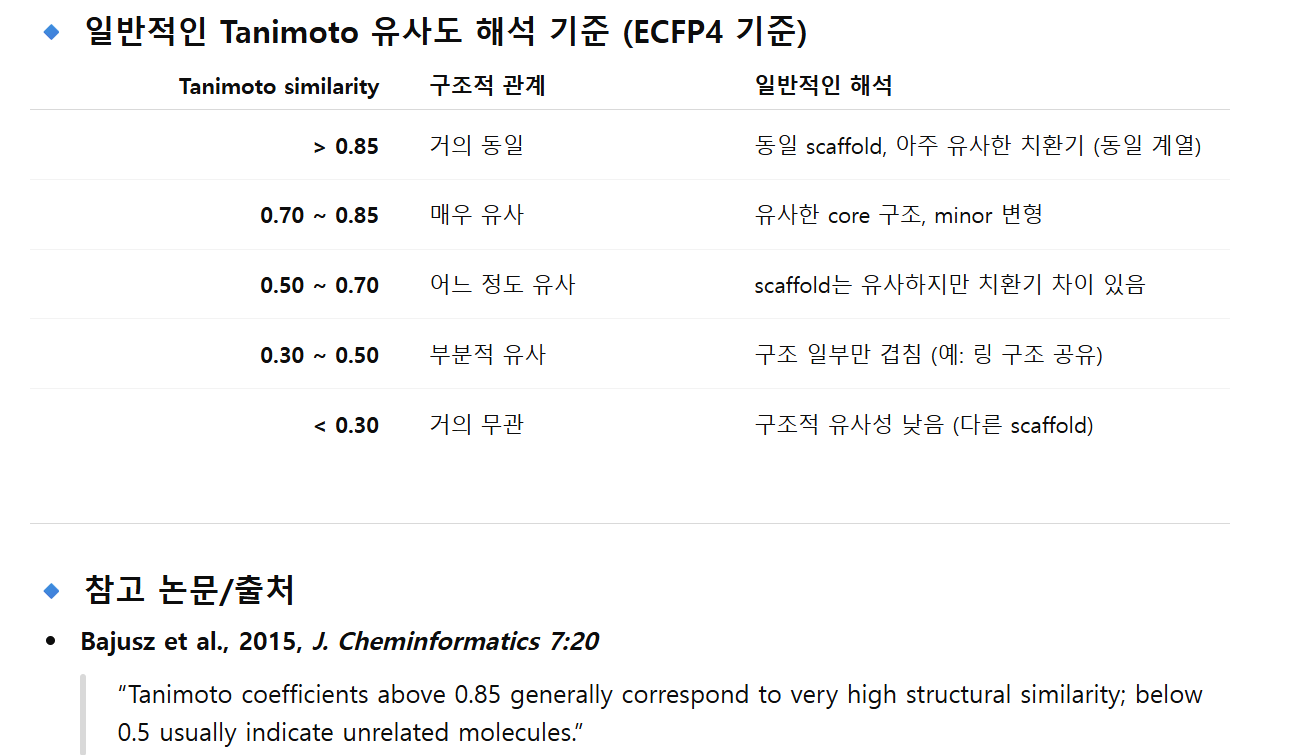

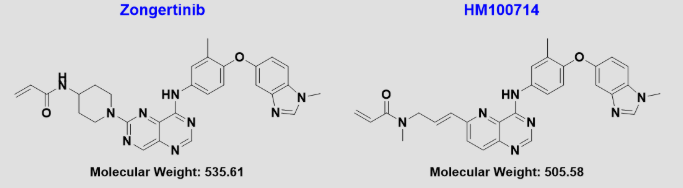